In [3]:
import pandas as pd

from nomenclature_parser.fuzzy_logic import fuzzy_logic
from nomenclature_parser.machine_learning_dictionary import create_word_dictionary
from nomenclature_parser.pattern_parser import parse_nomenclature

nomenclature = pd.read_excel("nomenclature.xlsx")
nomenclature = nomenclature.append(pd.read_excel("nomenclature2.xlsx"))
nomenclature_patterns = pd.read_excel("nomenclature_patterns.xlsx")

main_split_pattern = ' |\n|;|,|\\(|\\)'

word_dictionary = create_word_dictionary(nomenclature, nomenclature_patterns, main_split_pattern)

In [89]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


n_components = 2

#vectorizer = CountVectorizer(input='content', analyzer='char_wb')
vectorizer = TfidfVectorizer(input='content', analyzer='char_wb')
to_dense = FunctionTransformer(lambda x: x.todense(), accept_sparse=True)
#normalizer = Normalizer()
normalizer = StandardScaler(with_mean=True)
#normalizer = RobustScaler(with_centering=True)
#transformer = TruncatedSVD(n_components = n_components) # TODO may be PCA  with whiten
#transformer = PCA(n_components = n_components, whiten=True)
transformer = TSNE(random_state=43, n_components = n_components)

pipeline = make_pipeline(vectorizer, 
                         to_dense, 
                         normalizer, 
                         transformer)

In [90]:
nomenclature_patterns

,Наименование целевого ОЗМ,БЕИ,АЕИ,Производитель/ Бренд,Модель/ Партномер/ Название/ ГОСТ(Стандарт),Назначение/ Принадлженость,Классификатор,Тип/ Исполнение/ Конструкция/ Разновидность,Материал (Выбор из списка),Цвет (Выбор из списка),Размеры,Вес/Объем,Физическая величина,Доп признак: - Количество/Количество в упаковке
0,Аппарат кассовый,шт,-,"Производитель - Ручной ввод, при необходимости",Марка или уникальный (каталожный) номер устрой...,-,-,-,-,-,-,-,-,-
1,Детектор валют,шт,-,"Производитель - Ручной ввод, при необходимости",Марка или уникальный (каталожный) номер устрой...,-,-,-,-,-,-,-,-,-
2,Альбом,шт,-,"Производитель - Ручной ввод, в случае отсутвия...",-,Назначение - Ручной ввод\nПример:\nД/монет\nД/...,-,-,-,-,Формат - Выбор из Списка:\nА4\nА5\nА6,-,-,-
3,Бланк,Пачка,-,"Производитель - Ручной ввод, в случае отсутвия...",-,-,-,Тип - Выбор из Списка:\nПутевой лист\nУчетный\...,-,-,-,-,-,Количество листов - Ручной ввод:\nПример\n500
4,Блокнот,шт,-,"Производитель - Ручной ввод, в случае отсутвия...",-,Назначение - Ручной ввод\nПример:\nД/записей\n...,-,-,-,-,Формат - Выбор из Списка:\nА4\nА5\nА6,-,-,-
5,Бокс д/бумаги,шт,-,"Производитель - Ручной ввод, в случае отсутвия...",-,-,-,Тип - Выбор из Списка:\nГоризонтальный\nВертик...,-,-,Размер (мм) - Ручной ввод\nПример\n90х90х50,-,-,-
6,Бумага А3,Пачка,-,"Производитель - Ручной ввод, в случае отсутвия...",-,-,-,-,-,Цвет - Выбор из Списка:\nБелая\nЦветная,-,-,Плотность (г/м2) - Ручной ввод\nПример\n80,Количество листов - Ручной ввод:\nПример\n500
7,Бумага А4,Пачка,-,"Производитель - Ручной ввод, в случае отсутвия...",-,-,-,-,-,Цвет - Выбор из Списка:\nБелая\nЦветная,-,-,Плотность (г/м2) - Ручной ввод\nПример\n80,Количество листов - Ручной ввод:\nПример\n500
8,Бумага А5,Пачка,-,"Производитель - Ручной ввод, в случае отсутвия...",-,-,-,-,-,Цвет - Выбор из Списка:\nБелая\nЦветная,-,-,Плотность (г/м2) - Ручной ввод\nПример\n80,Количество листов - Ручной ввод:\nПример\n500
9,Бумага д/заметок,Пачка,-,"Производитель - Ручной ввод, в случае отсутвия...",-,-,-,-,-,-,Размер (мм) - Ручной ввод\nПример\n90х90,-,-,Количество листов - Ручной ввод:\nПример\n500


In [91]:
from nomenclature_parser.pattern_parser import get_nomenclature_item_characteristics
from nomenclature_parser.machine_learning_dictionary import split_string
import numpy as np

split_pattern = ' |\n|;|,|\\(|\\)'

def extract_words(item):
    characteristics = get_nomenclature_item_characteristics(item)
    x = []
    y = []
    result_words = []
    for k, vals in characteristics.items():
        for v in vals:
            words = split_string(v, split_pattern)
            for w in words:
                if w != '':
                    x.append(w)
                    y.append(k)
    return x, y
                    

X = []
Y = []
for index, item in nomenclature_patterns.iterrows():
    item_x, item_y = extract_words(item)
    X += item_x
    Y += item_y

X = pipeline.fit_transform(X)

classes = set(Y)
classToIndex = {}
indexToClass = {}
i = 0
for c in classes:
    classToIndex[c] = i
    indexToClass[i] = c
    i=i+1

markers = ['.', 'v', '1', '+', 'x', '*', 'd', '|', '_', '2', '3', '4']
colors = ['r', 'orange', 'y', 'g', 'b', 'lightblue', 'c', 'm', 'k', 'gray', 'lime', 'pink']

classToPoints = {}
for i, c in enumerate(Y):
    if c not in classToPoints:
        classToPoints[c] = []
    classToPoints[c].append(X[i])  
    
for c in classToPoints:
    classToPoints[c] = np.asarray(classToPoints[c])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


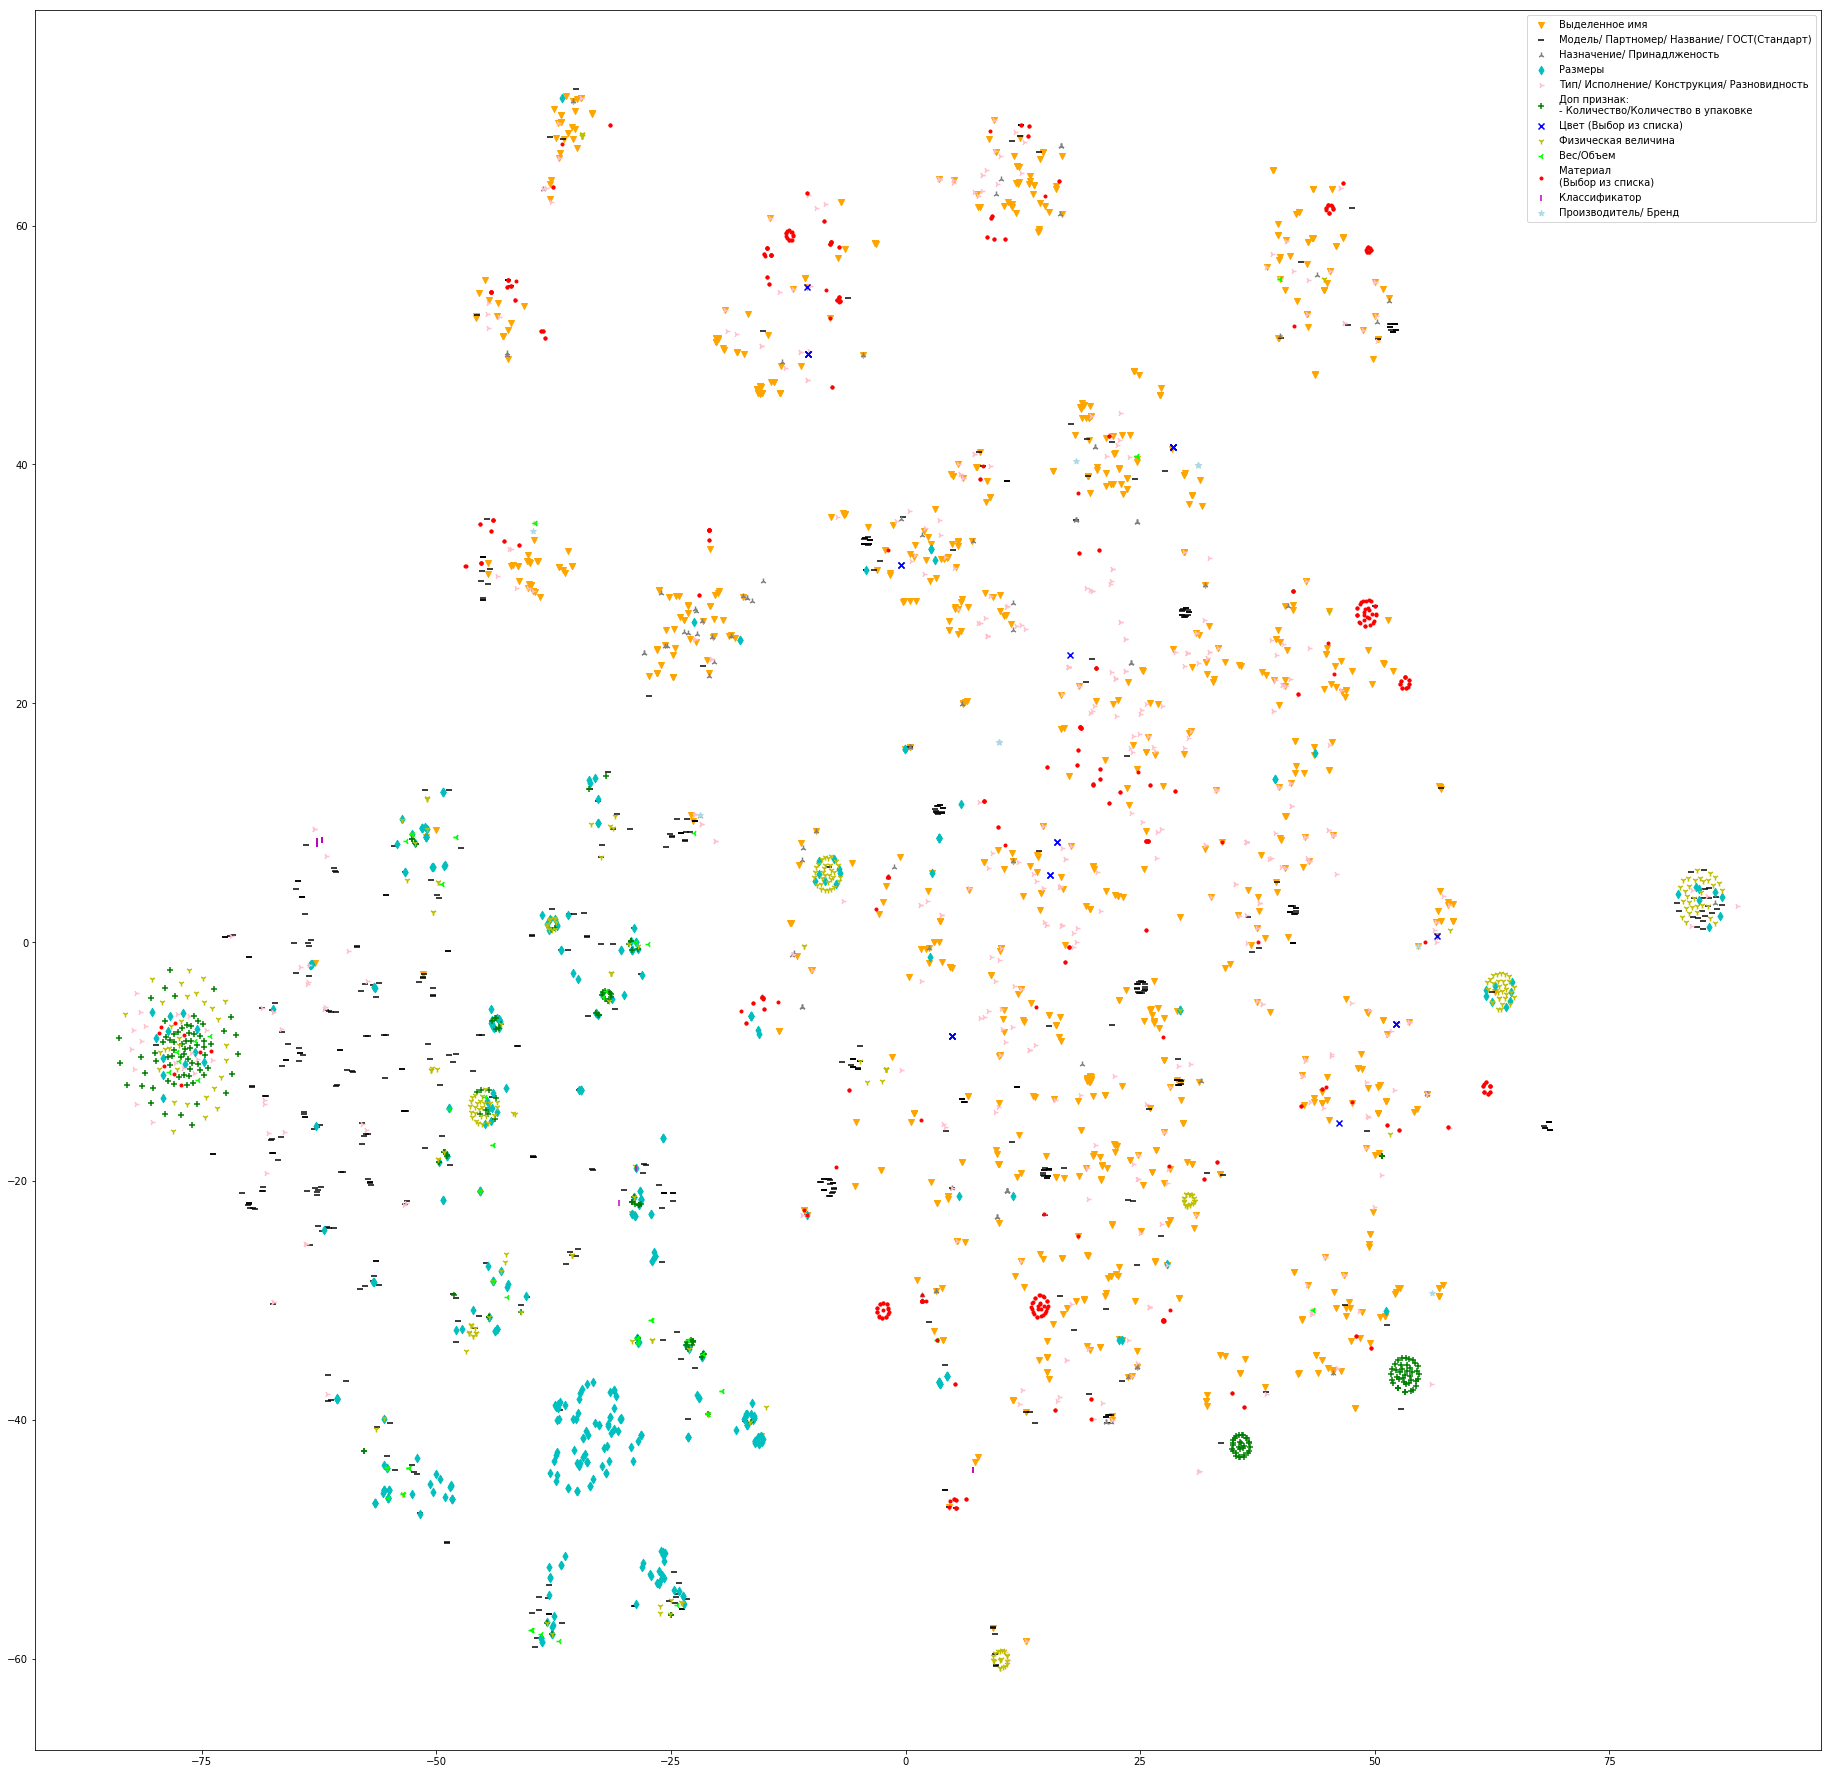

In [92]:
import matplotlib.pyplot as plt

s = []
for i in range(0, n_components - 1):
    for j in range(i+1, n_components):
        fig = plt.figure(figsize=(32,32))
        ax = fig.add_subplot(111)
        for c, x in classToPoints.items():
            index = classToIndex[c]
            scatter = ax.scatter(x[:, i], x[:, j], c=colors[index], marker=markers[index], label=c)
            s.append(scatter)
        ax.legend()